# Yelp Business Rating Prediction

Welcome to the NLP Project for this section of the course. In this NLP project  will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since I will utilize the pipeline methods for more complex tasks.

I will use the Yelp Review Data Set from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user.
The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! 

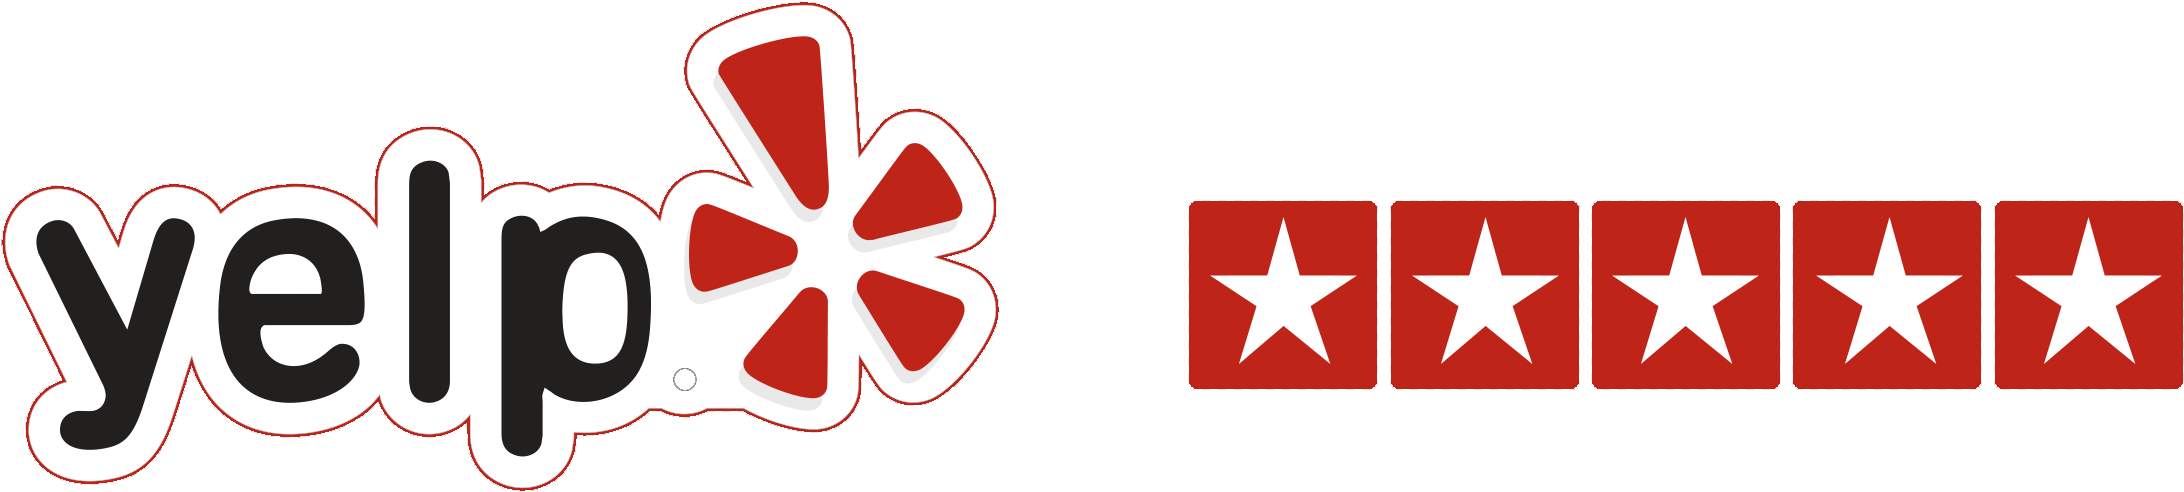

In [39]:
from IPython.display import Image, display
display(Image(filename= "D:\\Picture in data\\icon\\Deshbord\\142-1429407_yelp-reviews-5-star-yelp-logo.png"))

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('yelp.csv')
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column**

In [6]:
data['text length'] = data['text'].apply(len)

# EDA

Let's explore the data

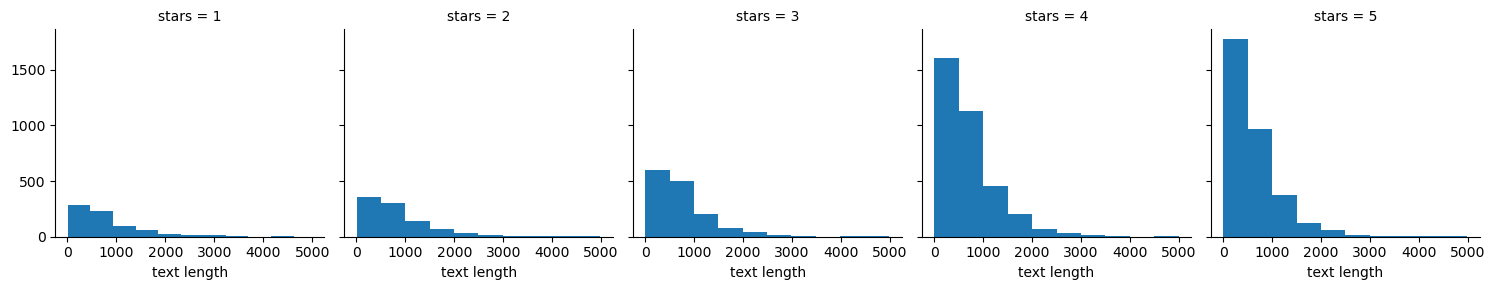

In [7]:
g = sns.FacetGrid(data,col='stars')
g.map(plt.hist,'text length')

C:\Users\HP\AppData\Local\Temp\ipykernel_8024\3360197642.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='text length', x='stars', palette='rainbow', legend=False)


<Axes: xlabel='stars', ylabel='text length'>

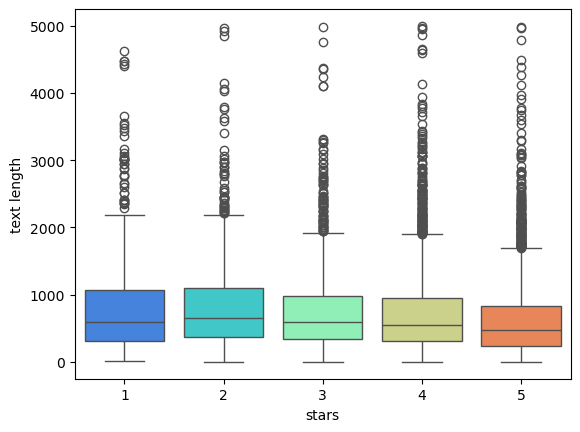

In [8]:
sns.boxplot(data=data, y='text length', x='stars', palette='rainbow', legend=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_8024\2326104769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x='stars',palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

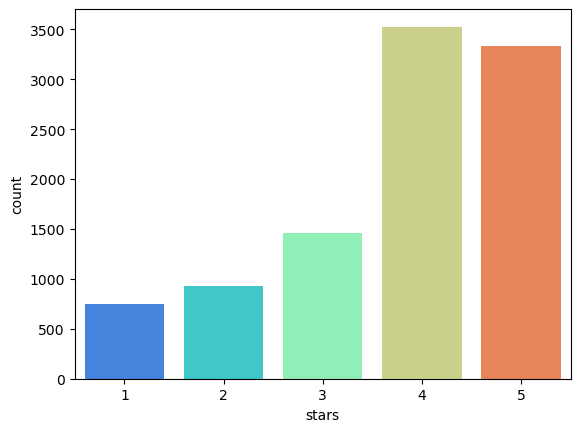

In [9]:
sns.countplot(data,x='stars',palette='rainbow')

** Use groupby to get the mean values of the numerical columns**

In [10]:
stars = data.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**the corr() method** 

In [11]:
stars.corr(numeric_only= True)

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

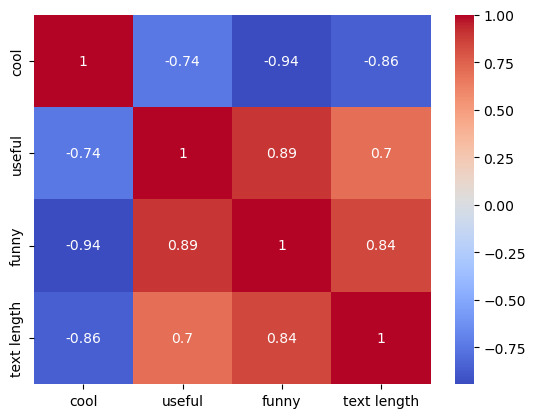

In [12]:
sns.heatmap(stars.corr(),annot=True,cmap='coolwarm')

## NLP Classification

In [13]:
y_class = data[(data.stars ==1)| (data.stars==5)]

In [14]:
y_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [15]:
# two objects X and y.
X = y_class['text']
y = y_class['stars']

In [16]:
y

0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

**Import CountVectorizer and create a CountVectorizer object.**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [18]:
X = cv.fit_transform(X)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

## Time to train a model!
** Import MultinomialNB and create an instance of the estimator and call is nb 

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [23]:
nb.fit(X_train,y_train)

MultinomialNB()

## Time to see how our model did!
**Use the predict method off of nb to predict labels from X_test.**

In [24]:
prediction = nb.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if I will try to include TF-IDF to this process using a pipeline.**

# Using Text Processing
Import TfidfTransformer 

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tft = TfidfTransformer()

In [31]:
# Import Pipeline from sklearn. 
from sklearn.pipeline import Pipeline


In [32]:
# Now create a pipeline
pipeline = Pipeline([
    ('cv',CountVectorizer()),  # strings to token integer counts
    ('tft',TfidfTransformer()),   # integer counts to weighted TF-IDF scores
    ('nb',MultinomialNB())    # train on TF-IDF vectors w/ Naive Bayes classifier 
])

### Train Test Split
**Redo the train test split on the y_class object.**

In [33]:
X = y_class['text']
y = y_class['stars']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

In [34]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tft', TfidfTransformer()),
                ('nb', MultinomialNB())])

### Predictions and Evaluation

In [35]:
pred = pipeline.predict(X_test)

In [36]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\HP\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Thank You 
`https://www.linkedin.com/in/monirul-m08/`  `https://github.com/MonirulIslamm08`     `md08monirul@gmail.com`